## Data Processing

In [29]:
# ========================================
# 1. Import library
# ========================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# ========================================
# 2. Load dataset dari Excel
# ========================================
file_path = "/content/hitung.xlsx"  # ganti sesuai file mu
df = pd.read_excel(file_path, sheet_name="Bayes")

# ========================================
# 3. Bersihkan data
# ========================================
df = df[['contrast', 'homogeneity', 'energy', 'correlation', 'label']]  # ambil kolom penting
df = df.dropna()  # hapus NaN

print("Data setelah dibersihkan:")
print(df.head())

# 👉 Simpan hasil bersih ke file Excel baru
cleaned_path = "/content/data_naive_bayes_cleaned.xlsx"
df.to_excel(cleaned_path, index=False)
print(f"\nDataset bersih berhasil disimpan ke: {cleaned_path}")


Data setelah dibersihkan:
   contrast  homogeneity    energy  correlation  label
0  0.158255     0.922023  0.557250     0.832653  sehat
1  0.174310     0.915703  0.555993     0.814053  sehat
2  0.170174     0.917753  0.568853     0.788128  sehat
3  0.170604     0.917408  0.566044     0.788189  sehat
4  0.180431     0.912847  0.557925     0.783905  sehat

Dataset bersih berhasil disimpan ke: /content/data_naive_bayes_cleaned.xlsx


## Melihat Hasil Models

## Load Data Excel Convert To Models Gaussian Naive Bayes .pkl

In [11]:
# Install Library
# !pip install -U scikit-image

# ====================================
# 2. Import Library
# ====================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skimage.feature.texture import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.transform import resize
import joblib
import glob
import os
from pathlib import Path

# ====================================
# 3. Fungsi Ekstraksi Fitur GLCM
# ====================================
def extract_glcm_features(image_path):
    img = imread(image_path)
    img_gray = rgb2gray(img)
    img_gray = (img_gray * 255).astype('uint8')

    # Hitung GLCM
    glcm = graycomatrix(img_gray,
                        distances=[1],
                        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                        symmetric=True,
                        normed=True)

    contrast = graycoprops(glcm, 'contrast').mean()
    correlation = graycoprops(glcm, 'correlation').mean()
    energy = graycoprops(glcm, 'energy').mean()
    homogeneity = graycoprops(glcm, 'homogeneity').mean()

    return [contrast, correlation, energy, homogeneity]

# ====================================
# 4. Load Dataset
# ====================================
data = []
labels = []

base_path = "/content/dataset"  # Ganti dengan path datasetmu
categories = ["sehat", "hama_keong", "hama_kutu", "hama_ulat"]

for label in categories:
    folder = Path(base_path) / label
    if not folder.exists():
        print(f"Folder {folder} tidak ditemukan!")
        continue

    for file in folder.glob("*.*"):  # semua jenis file
        if file.suffix.lower() in [".jpg", ".jpeg", ".png"]:
            features = extract_glcm_features(str(file))
            data.append(features)
            labels.append(label)

# ====================================
# 5. Buat DataFrame
# ====================================
df = pd.DataFrame(data, columns=["contrast", "correlation", "energy", "homogeneity"])
df["label"] = labels

print(df.head())

# ====================================
# 6. Split Data Train-Test
# ====================================
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====================================
# 7. Latih Gaussian Naive Bayes
# ====================================
model = GaussianNB()
model.fit(X_train, y_train)

# ====================================
# 8. Evaluasi
# ====================================
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ====================================
# 9. Simpan Model
# ====================================
joblib.dump(model, "naive_bayes_glcm.pkl")
print("Model berhasil disimpan sebagai naive_bayes_glcm.pkl")


    contrast  correlation    energy  homogeneity  label
0  30.969306     0.989842  0.024874     0.358020  sehat
1  34.085276     0.989124  0.023411     0.333748  sehat
2  38.462861     0.987206  0.024222     0.336427  sehat
3  14.436229     0.994336  0.032093     0.429443  sehat
4  22.713292     0.993653  0.026927     0.402099  sehat
Akurasi: 0.4583333333333333

Confusion Matrix:
 [[1 1 2 3]
 [2 5 0 0]
 [0 3 1 0]
 [0 1 1 4]]

Classification Report:
               precision    recall  f1-score   support

  hama_keong       0.33      0.14      0.20         7
   hama_kutu       0.50      0.71      0.59         7
   hama_ulat       0.25      0.25      0.25         4
       sehat       0.57      0.67      0.62         6

    accuracy                           0.46        24
   macro avg       0.41      0.44      0.41        24
weighted avg       0.43      0.46      0.43        24

Model berhasil disimpan sebagai naive_bayes_glcm.pkl


## Testing Gambar Daun Sawi  

Saving ulatdaun (16).jpg to ulatdaun (16).jpg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


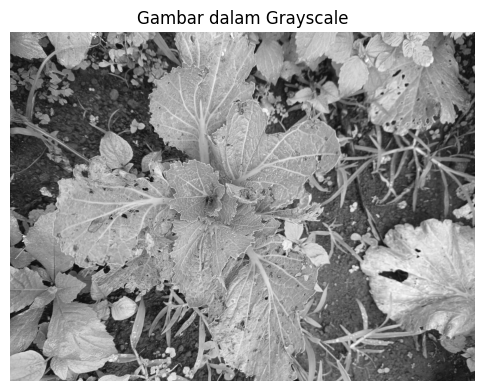


================ HASIL KLASIFIKASI ================

Gambar ini diprediksi sebagai: **hama_ulat**
Kemungkinan terbesar: hama_ulat dengan probabilitas 0.80

(Probabilitas dihitung menggunakan Gaussian Naive Bayes + fitur GLCM)



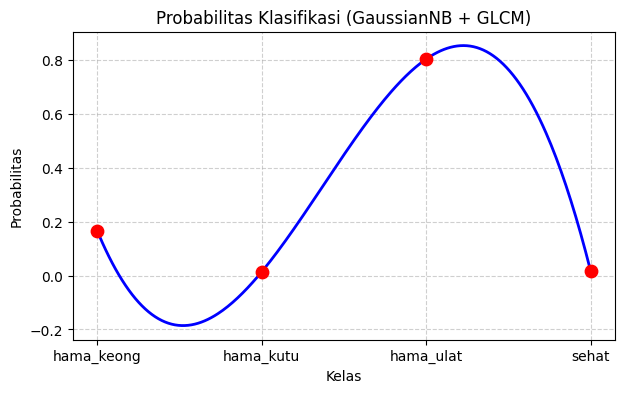

In [23]:
from google.colab import files
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Upload gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Ekstrak fitur GLCM
features = np.array(extract_glcm_features(file_name)).reshape(1, -1)

# Prediksi
pred = model.predict(features)[0]
proba = model.predict_proba(features)[0]

# Cari kelas dengan probabilitas tertinggi
max_class = model.classes_[np.argmax(proba)]
max_proba = np.max(proba)

# ====== Tampilkan gambar dalam grayscale ======
img = imread(file_name)
gray_img = rgb2gray(img)

plt.figure(figsize=(6, 6))
plt.imshow(gray_img, cmap='gray')
plt.title("Gambar dalam Grayscale")
plt.axis("off")
plt.show()

# ====== Spasi + Teks Hasil Prediksi ======
print("\n================ HASIL KLASIFIKASI ================\n")
print(f"Gambar ini diprediksi sebagai: **{pred}**")
print(f"Kemungkinan terbesar: {max_class} dengan probabilitas {max_proba:.2f}")
print("\n(Probabilitas dihitung menggunakan Gaussian Naive Bayes + fitur GLCM)\n")

# ====== Tampilkan probabilitas dalam bentuk kurva halus ======
x = np.arange(len(model.classes_))          # posisi kelas
x_smooth = np.linspace(x.min(), x.max(), 300)  # bikin kurva lebih rapat

# Gunakan cubic spline untuk membuat kurva lebih mulus
spline = make_interp_spline(x, proba, k=3)
proba_smooth = spline(x_smooth)

plt.figure(figsize=(7, 4))
plt.plot(x_smooth, proba_smooth, color='blue', linewidth=2)
plt.scatter(x, proba, color='red', s=80, zorder=5)  # titik asli
plt.xticks(x, model.classes_)  # label kelas di sumbu X
plt.title("Probabilitas Klasifikasi (GaussianNB + GLCM)")
plt.ylabel("Probabilitas")
plt.xlabel("Kelas")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
